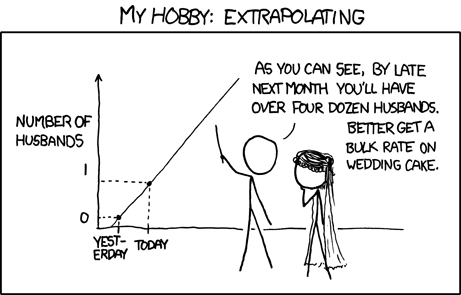
<div align="center"> https://xkcd.com/605/ </div>

At the beginning of my Data science Journey i was intemidated and i didn't know where to start, and i thought that it is boring and has lack of creativity, but as much as i dive in, i realize how versatile it is, how fun it can be, where the limits are only your imagination.
What ever your coding background you will find a suitable way to code in Data science with it's multible languages, platforms, libraries and support.

Here I will use :

* Barplots
* Countplot
* Piechart
* Treemap (using squarify)
* stacked barplot
* Heatmap
* Wordcloud (using WordCloud library)
* FacetGrid
* Geomap (using Geopy and folium)

The notebook contains analysis of:
* [Age Distribution](#ageLink)
* [Age and Gender](#agegenderLink)
* [Country Of residence](#country)
* [Education Background](#education)
* [Current Role title](#role)
* [Experience Years](#experience)
* [Programming Languages](#languages)
* [Programming Languages Based on Role title and Education Background](#languagestitle)
* [Programming Languages used for each Age range](#langage)
* [Recommended First Programming language](#firstlanguage)
* [Favorite Integrated development environments](#ides)
* [Most Hosted Notebooks](#notebooks)
* [Most used visualization libraries](#vis)
* [Currently Yearly Compensation](#compensation)
* [Duration of using Machine learning methods](#mlyears)
* [Machine Learning Frameworks used](#frame)
* [Machine learning Algorithms used](#algo)




I have my own rule of thumb, If the plots are readable in XKCD format then it will be very clear without it.
The kaggle survey database is very challenging as it only contains Qualitative data.

The data set depends on the 2020 Kaggle DS & ML Survey which received 20,036 usable responses from participants in 171 different countries and territories. If a country or territory received less than 50 respondents, they are grouped into a group named “Other” for anonymity.

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#reading the kaggle survey data file
df =pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [3]:
#Here we ignored the first row which contains the questions
df = df.iloc[1:, :]

<div id="ageLink"></div>
   
# Q1 Age Distribution

At first Let's plot the distribution of developers age to see if there is special relation between age and Developing data science

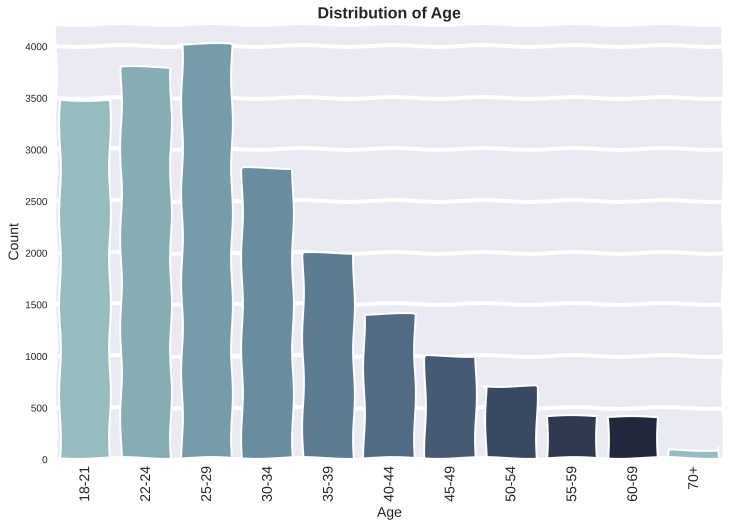

In [4]:
#Here we used the xkcd() function which converts every thing to comic style
plt.xkcd(scale=.9,length=90,randomness=0.9)
#Preparing the data
age_data = df['Q1'].value_counts().sort_index()
#ploting the graph
custom_color =sb.cubehelix_palette(10, rot=-.25, light=.7)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
sb.countplot(x="Q1", data=df, palette = custom_color,order=age_data.index)
#Decorating the plot
plt.title('Distribution of Age',fontsize=16,weight = 'bold')
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14);

*Data science is mostly done by the young developers belowe 35 years old*

<div id="agegenderLink"></div>
    
    
# Q1 , Q2 Age and Gender

Now let's plot the distribution of Developers for different Age and Gender


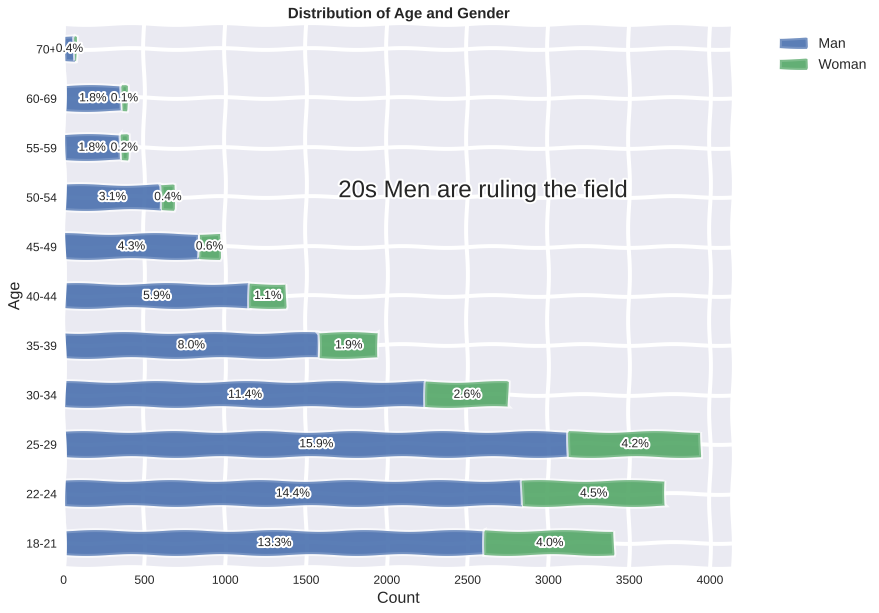

In [5]:
#Let's narrow the genders to only men and women to facilitate the analysis(as they are the main categories)
gender_df = df[df['Q2'].isin(['Man','Woman'])]
table = gender_df.groupby(['Q1', 'Q2']).size().reset_index().pivot(columns='Q2', index='Q1', values=0)
plt.style.use('seaborn')
    
ax=table.plot(stacked=True,kind='barh',figsize=(12,10),alpha=0.7)

index_list = table.index.values
total = table.values.sum()

#ploting the annotation text
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
        ratio = (table.loc[(i)][j])/ total
        x_pos = table.loc[(i)][j]+ tot_x
        tot_x += table.loc[(i)][j]
        if(ratio >= 0.001):
            plt.text(x = x_pos - table.loc[(i)][j]/2, y = np.where(index_list == i)[0][0]
                     ,s= '%.1f'%(ratio*100)+'%' ,va='center', ha='center', size=12)

#Decorating the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 14})
plt.xlabel('Count',fontsize=16)
plt.ylabel('Age',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of Age and Gender',fontsize=15,weight='bold')
plt.annotate('20s Men are ruling the field' , xy =(1700,7),fontsize=24);

*In general Men are leading the Data science field especially those of age 20s*

<div id="country"></div>
    
    
# **Q3 Country of residence**

Let's see the developers distribution across the countries 

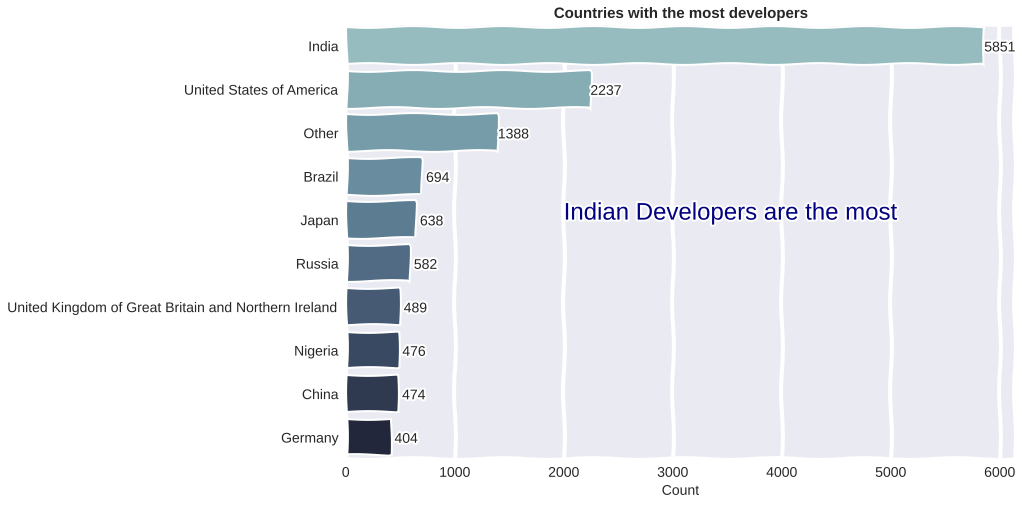

In [6]:
#Here we specify the largest 10 countries for data science developers
countries_with_most_developers = df['Q3'].value_counts().nlargest(10).sort_values(ascending=False)
plt.figure(figsize=(12,8))
#countries_with_most_developers.plot(kind='barh',color=custom_color)
splot = sb.barplot(x = countries_with_most_developers.values ,y = countries_with_most_developers.index ,palette=custom_color)
#Decorating the plot
plt.title('Countries with the most developers',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)

#add annotation to each bar
for p in splot.patches:
    width = p.get_width()
    plt.text(150+p.get_width(), p.get_y()+0.55*p.get_height(),
             int(width),
             ha='center', va='center')

    
#Make a annotation to show the most obvious result
plt.annotate('Indian Developers are the most' , xy =(2000,4),fontsize=24,color='navy');

*It's obvious how developers in india are the most with more than double of those in usa*

*and here is a world map with the users percentage*

In [7]:
#make a new dataframe for residence country and count
country_df = df['Q3'].value_counts().rename_axis('country').reset_index(name='counts')
country_df = country_df[country_df['country'] != 'Other']

#use geopy library to get location of countries
from geopy.geocoders import Nominatim
#import folium library to plot a geo map
import folium
from folium.plugins import MarkerCluster

geolocator = Nominatim(user_agent='world_map')
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

#some countries have unrecognized names 
country_df['country'].replace({'Iran, Islamic Republic of...' : 'Iran','Republic of Korea':'North Korea'},inplace=True)
country_df['coord'] = country_df['country'].apply(lambda x : geolocate(x))

#split the coordinates to latitude and longitude
country_df['latitude']=  [x[0] for x in country_df['coord']]
country_df['longitude'] = [x[1] for x in country_df['coord']]
all_users = country_df.counts.sum()

#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(country_df)):
        lat = country_df.iloc[i]['latitude']
        long = country_df.iloc[i]['longitude']
        radius=5
        popup_text = """
                    {}% of all Users <br>"""
        popup_text = popup_text.format('{:.2f}'.format(country_df.iloc[i]['counts']*100/country_df.counts.sum()))
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

<div id="education"></div>
    
    
# **Q4 Education Background**

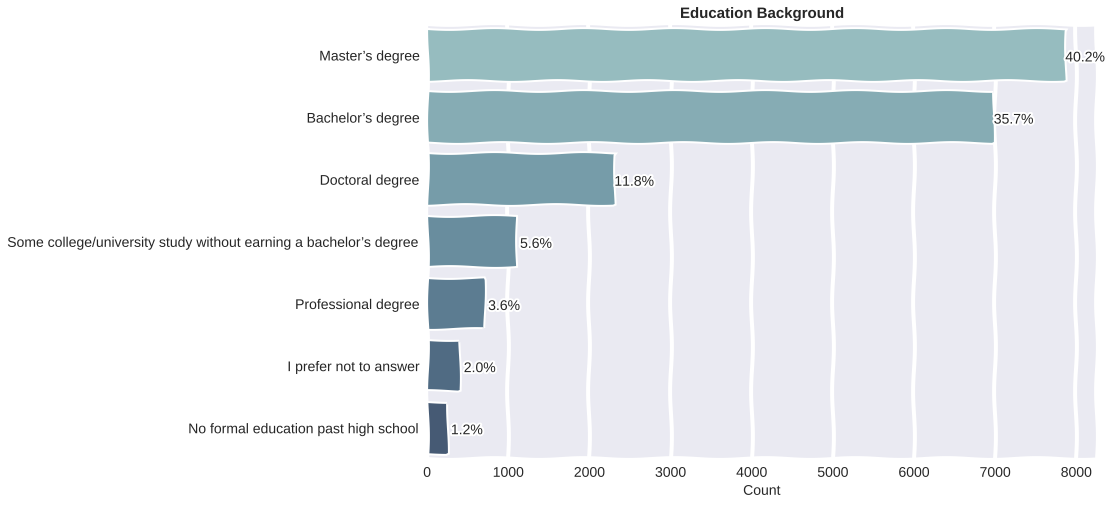

In [8]:
#preparing the data
education_df = df['Q4'].value_counts().sort_values(ascending=False)
#ploting the graph
plt.figure(figsize=(12,8))
splot = sb.barplot(x = education_df.values ,y = education_df.index ,palette=custom_color)

#add annotation to each bar
total = education_df.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(250+p.get_width(), p.get_y()+0.55*p.get_height(),
            '%.1f'%(ratio*100)+'%',
             ha='center', va='center')

#Decorating the plot
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Education Background',fontsize=15,weight='bold')
plt.xlabel('Count',fontsize=14);

*Most of Data scientists have Master's and Bachelor's degrees*


<div id="role"></div>
    
    
# **Q5 Current Role Title**

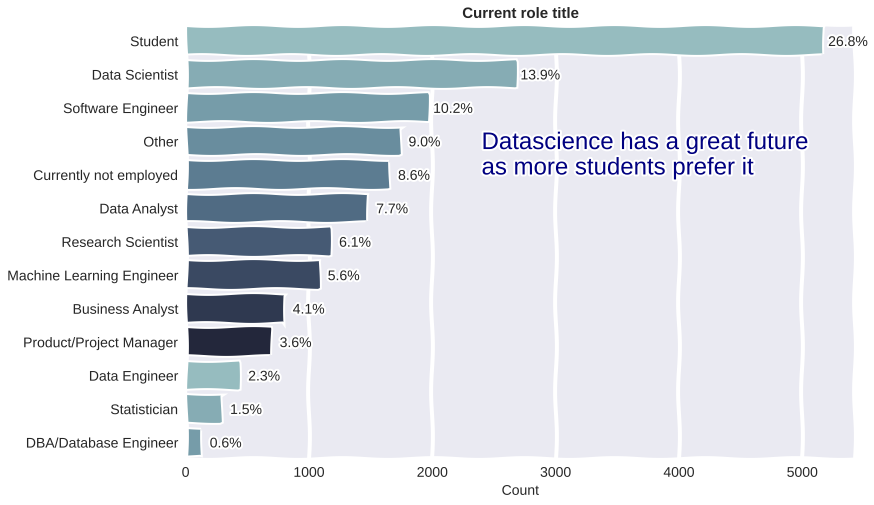

In [9]:
#preparing the data
title_df = df['Q5'].value_counts().sort_values(ascending=False)
#ploting the graph
plt.figure(figsize=(12,8))
splot = sb.barplot(x = title_df.values ,y = title_df.index ,palette=custom_color)

#add annotation to each bar
total = title_df.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(200+p.get_width(), p.get_y()+0.55*p.get_height(),
            '%.1f'%(ratio*100)+'%',
             ha='center', va='center')
    
#Decorating the plot
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Current role title',fontsize=15,weight='bold')
plt.xlabel('Count',fontsize=14)
plt.annotate('Datascience has a great future \nas more students prefer it' , xy =(2400,4),fontsize=24,color='navy');

*Here we can notice that Data science is an ongoing educational process and that's why most of data scientists call them sleves students, so we shouldn't ever stop learning and exploring new subjects.*


<div id="experience"></div>
    
    
# **Q6 Experience Years**

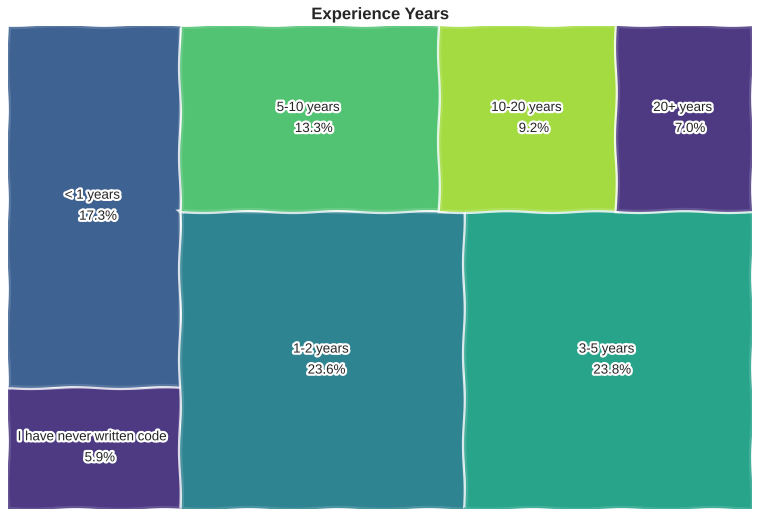

In [10]:
#here we make a treemap using squarify library
import squarify

# Prepare Data
years_order =  ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
exp_yrs_df = df['Q6'].value_counts()[years_order]
perc = [str('{:5.1f}%'.format(i/exp_yrs_df.values.sum()*100)) for i in exp_yrs_df.values]
labels = [el[0] + " \n " + el[1] for el in zip(exp_yrs_df.index, perc)]
sizes = exp_yrs_df.values.tolist()

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=sb.color_palette('viridis'), alpha=.8,  text_kwargs={'fontsize':12,'linespacing':2})

# Decorate
plt.axis('off')
plt.title('Experience Years',fontsize=15,weight='bold')
plt.show();

*Well about 70% of users have experience lower than 5 years, so it is never too late to start a data science career*

<div id="languages"></div>
    
    
# **Q7 Programming languages**


Data science can be applied using more than 10 langauges and each langauge has different corresponding tools like libraries and IDEs, so let's analyze the Programming languages used and their relation to different variables as gender, age, role title and education background

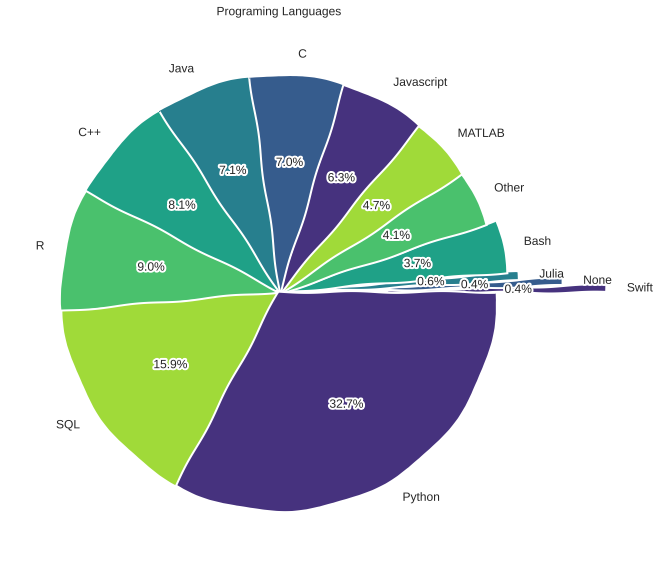

In [11]:
df_language = df[[i for i in df.columns if 'Q7' in i]]
df_language_all = pd.Series(dtype='int')
for i in df_language.columns:
    df_language_all[df_language[i].value_counts().index[0]] = df_language[i].count()

df_language_all = df_language_all.sort_values(ascending=True)
plt.figure(figsize=(10,10))
expl = [0.5,0.3,0.1,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
df_language_all.plot(kind='pie',explode=expl,title='Programing Languages'
                     ,colors=sb.color_palette('viridis'),textprops={'fontsize': 12}, autopct='%1.1f%%')
plt.ylabel('');

Here we will analyze the prgramming languages used for each gender

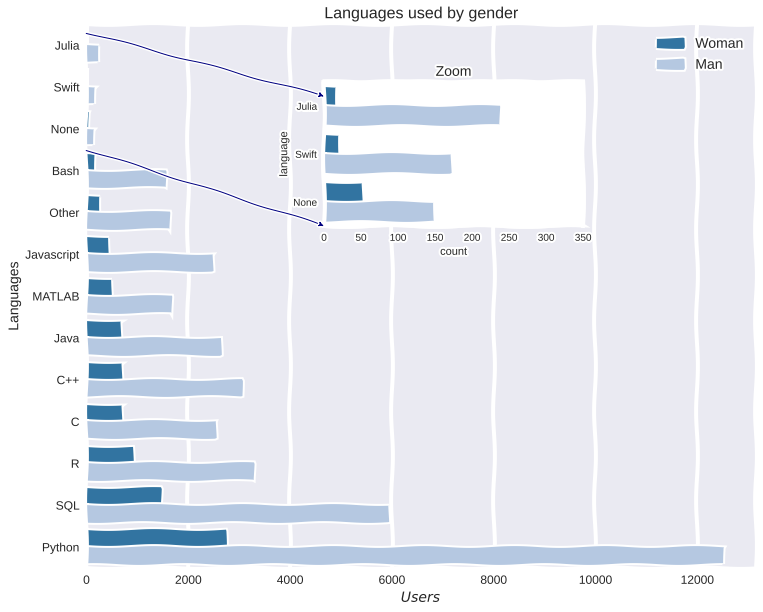

In [12]:
d = {'Q7_Part_1':'Python','Q7_Part_2':'R','Q7_Part_3':'SQL','Q7_Part_4':'C','Q7_Part_5':'C++','Q7_Part_6':'Java','Q7_Part_7':'Javascript'
           ,'Q7_Part_8':'Julia','Q7_Part_9':'Swift','Q7_Part_10':'Bash','Q7_Part_11':'MATLAB','Q7_Part_12':'None','Q7_OTHER':'Other'}
df_lang_copy = gender_df.rename(columns= d)
columns=['Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MATLAB','None','Other']

new_data= df_lang_copy.groupby('Q2')[columns].count()
n1 = new_data.unstack().reset_index()
n1 = n1.rename(columns={'level_0':'language','Q2':'gender',0:'count'})

# Draw Plot
fig, ax = plt.subplots(figsize=(12,10))
sb.barplot(x='count', y='language', data= n1.sort_values('count'),hue='gender',palette='tab20',ax=ax)

# Decorations    
ax.set_xlabel("$Users$",fontsize=14)
ax.set_ylabel("Languages",fontsize=14)
ax.tick_params(labelsize=12)
ax.set_title("Languages used by gender", fontsize=16)

#adding the zoom window to show values of low used languages
ax2 = plt.axes([0.4, 0.6, .3, .2], facecolor='w')
sb.barplot(x='count', y='language', data= n1.sort_values('count')
           ,hue='gender',palette='tab20',ax=ax2)
ax2.set_xlim([0,350])
ax2.set_ylim(2.5,None)
ax2.set_title('Zoom',fontsize=14)

#adding the two connection lines between the zoom and the main plot
con1 = ConnectionPatch(xyA=(0, -0.2), coordsA=ax2.transData, 
                       xyB=(0, -0.3), coordsB=ax.transData, color = 'navy',arrowstyle ="<|-")

con2 = ConnectionPatch(xyA=(0, 2.5), coordsA=ax2.transData
                       , xyB=(0, 2.5), coordsB=ax.transData, color = 'navy',arrowstyle='<|-')

#increasing the width of the connection line
con1.set_linewidth(1)
con2.set_linewidth(1)

#adding the connection lines to the figure
fig.add_artist(con1)
fig.add_artist(con2)
#adding the legend to the outer plot
ax.legend(fontsize=14)
ax2.get_legend().remove()

plt.show()

*Whatever your prefered programming language you will be able to code in data science with more than 10 languages to start with. But still Python, SQL,and R languages are the black horses in the field*

<div id="languagestitle"></div>

# Q7,Q4,Q5 Programming Languages based on Role title and Education Background

Let's see if prefered Programming Languages differes according to Role title and Education Background, we will use Heatmap for this question.

In [13]:
#Preparing the data by grouping by role title and making a pivot table for the heat map
new_data2= df_lang_copy.groupby('Q5')[columns].count()
n2 = new_data2.unstack().reset_index()
n2 = n2.rename(columns={'level_0':'language','Q5':'role',0:'count'})
new_table = pd.pivot_table(n2,values = 'count',index='language',columns='role')
#cmap =sb.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

#Preparing the data by grouping by education background and making a pivot table for the heat map
new_data3= df_lang_copy.groupby('Q4')[columns].count()
n3 = new_data3.unstack().reset_index()
n3 = n3.rename(columns={'level_0':'language','Q4':'education',0:'count'})
new_table2 = pd.pivot_table(n3,values = 'count',index='language',columns='education')
#cmap =sb.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)


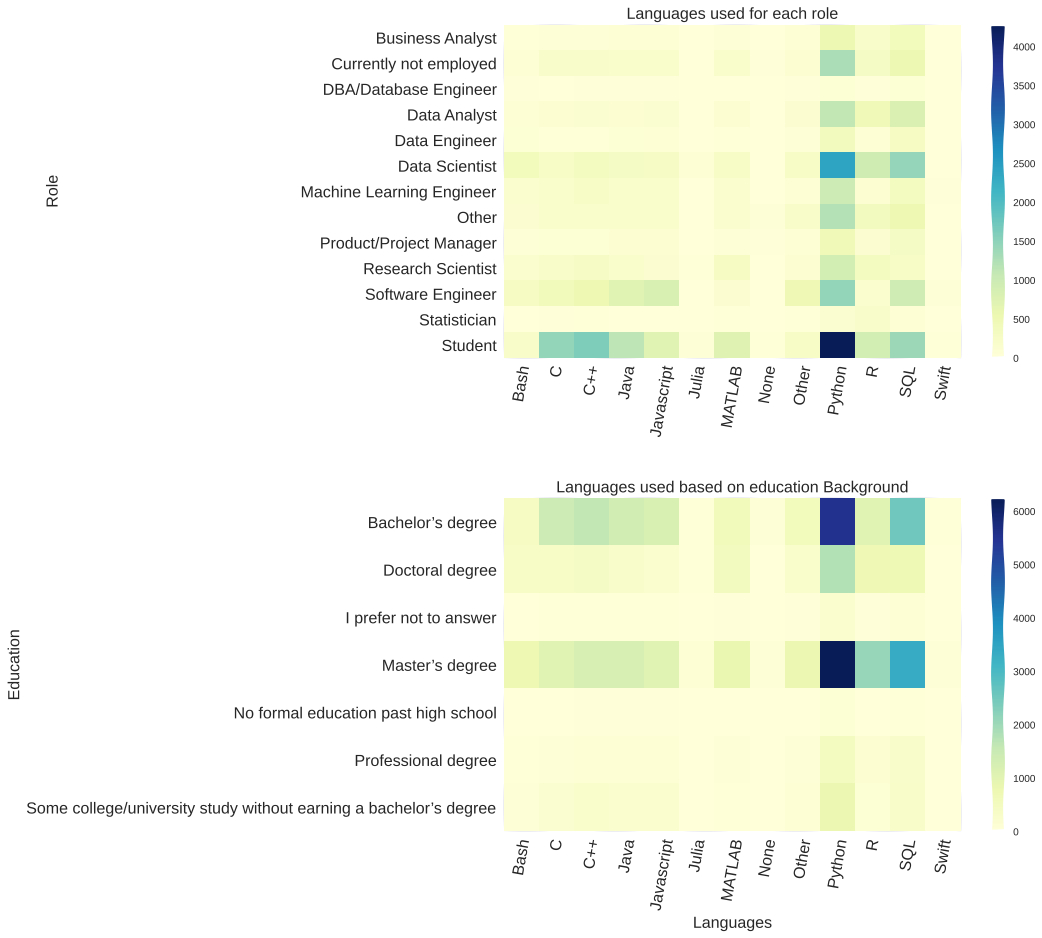

In [14]:
fig, ax =plt.subplots(2,1,figsize = (16,14))

sb.heatmap(new_table.T,cmap = 'YlGnBu', ax=ax[0])
sb.heatmap(new_table2.T, cmap = 'YlGnBu',ax=ax[1])

ax[0].set_title('Languages used for each role',fontsize=16)
ax[1].set_title('Languages used based on education Background',fontsize= 16)

ax[0].set_ylabel('Role',fontsize=16)
ax[1].set_ylabel('Education',fontsize=16)

ax[0].set_xlabel('',fontsize=16)
ax[1].set_xlabel('Languages',fontsize=16)

ax[0].tick_params(axis='both',which='both', labelsize=16)
ax[1].tick_params(axis='both', labelsize=16)
ax[0].tick_params(axis='x',rotation=80)
ax[1].tick_params(axis='x',rotation=80)
ax[0].yaxis.labelpad = 240
fig.tight_layout(pad=3.0);

*As it appears Python is very popular among the students and Data scientists, while some students prefer C and C++, and according to the education background Developers with Master's and Bachelor degree also prefer Python and some of them prefer SQL*


<div id="langage"></div>
    
    
# Q6 & Q7 Languages used for each range of age

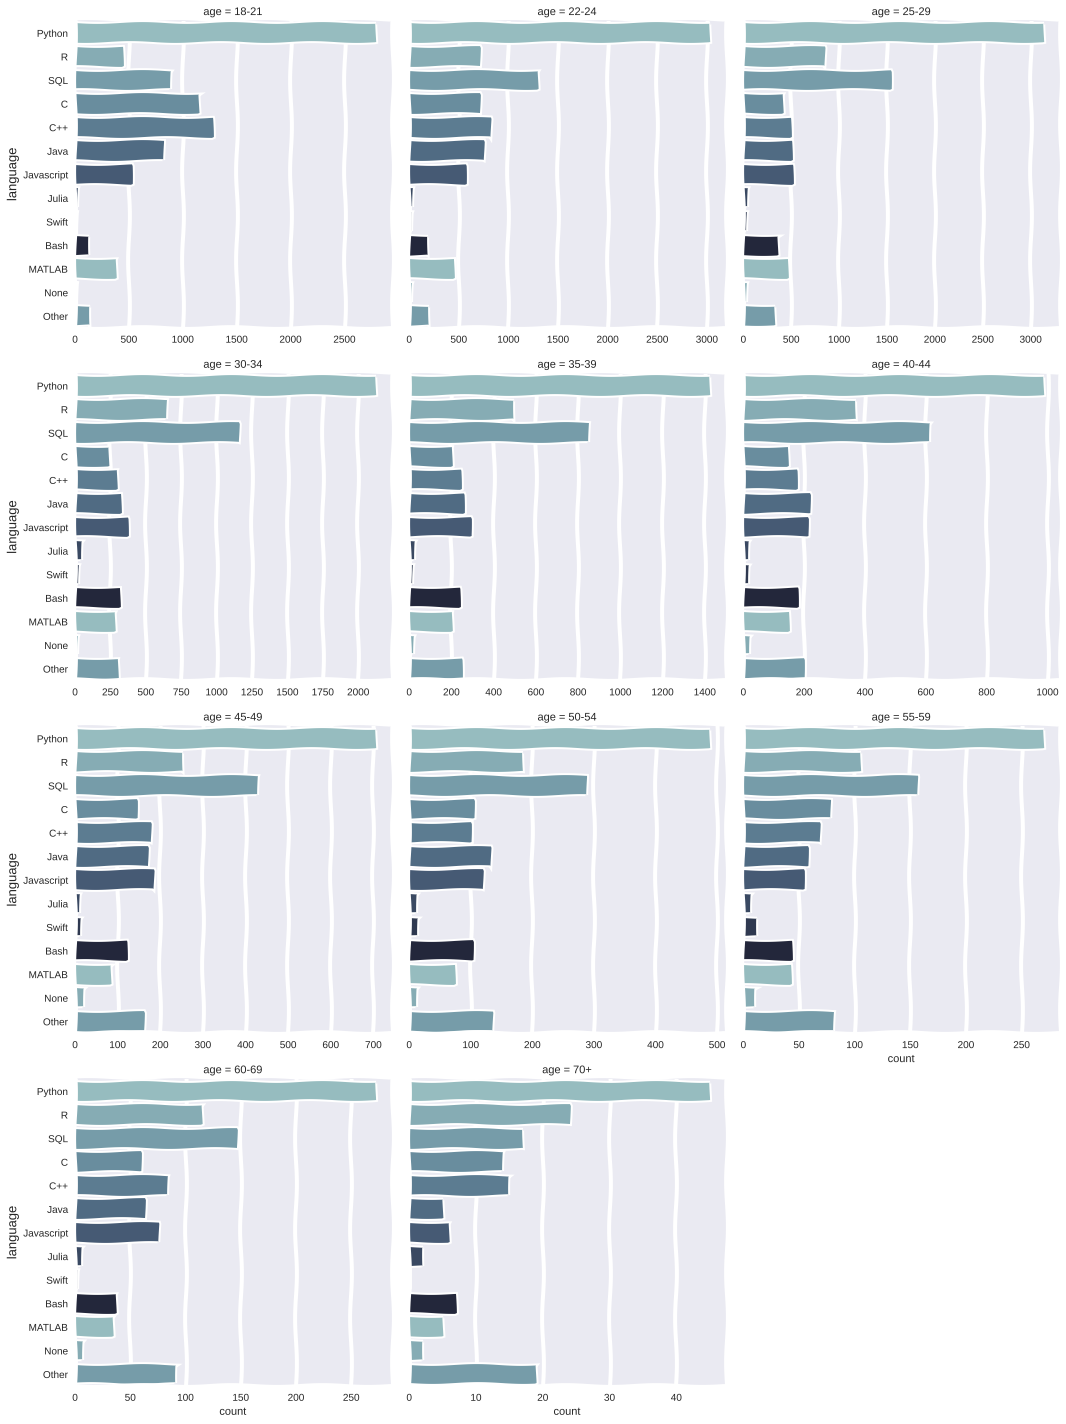

In [15]:
#using the previous dataframe created for languages 
n2 = df_lang_copy.groupby('Q1')[columns].count()
n2 =n2.unstack().reset_index()
n2 = n2.rename(columns={'level_0':'language','Q1':'age',0:'count'})

# Plot the Seaborn's FacetGrid
plt.style.use('seaborn')
g = sb.FacetGrid(data = n2, col = 'age',col_wrap=3,height = 5,sharex=False)
g.map(sb.barplot, 'count','language',palette= custom_color)
g.set_ylabels(fontsize=13);

*It seems that Python and SQL are the most famous languages for most age ranges except for ages 18-22 where Python, C and C++ are the most common languages.*


<div id="firstlanguage"></div>
    
    
# Q8 Recommended First Programming language

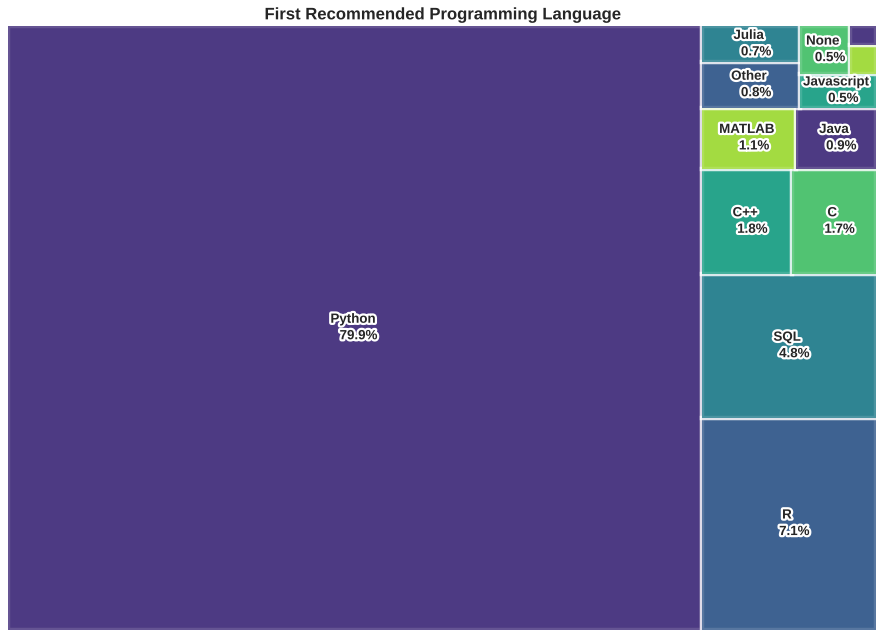

In [16]:
#and now let's stop the cartoonish effects before you get bored
plt.xkcd(False)

# Prepare Data
df_first_language_all = df['Q8'].value_counts()
perc = [str('{:5.1f}%'.format(i/df_first_language_all.values.sum()*100)) for i in df_first_language_all.values]
labels = [el[0] + " \n " + el[1] for el in zip(df_first_language_all.index, perc)]
sizes = df_first_language_all.values.tolist()

# Draw Plot
plt.style.use('seaborn')
plt.figure(figsize=(14,10), dpi= 80)
squarify.plot(sizes=sizes, label=labels[:-2], color=sb.color_palette('viridis'), alpha=.8
              ,  text_kwargs={'fontsize':12,'linespacing':1.5,'fontweight':'bold'})

# Decorate
plt.axis('off')
plt.title('First Recommended Programming Language',fontsize=15,weight='bold')
plt.show();

*when asked about Recommended Programming language to learn first most people recommended Python as it is easy to learn and has alot of support and libraries*


<div id="ides"></div>
    
    
# **Q9 Favourite IDEs**

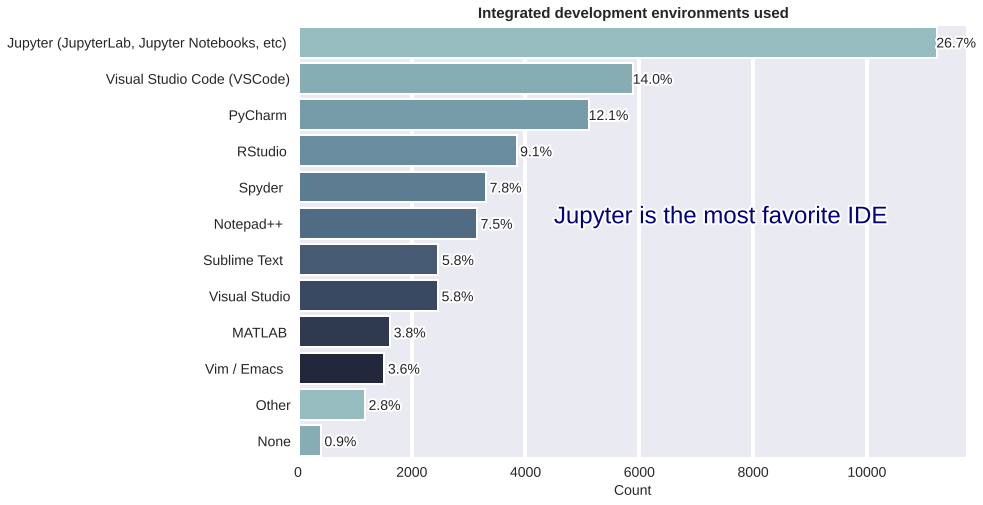

In [17]:
#preparing the data
df_ides = df[[i for i in df.columns if 'Q9' in i]]
df_ides_all = pd.Series(dtype='int')
for i in df_ides.columns:
    df_ides_all[df_ides[i].value_counts().index[0]] = df_ides[i].count()

df_ides_all = df_ides_all.sort_values(ascending=False)
#ploting the graph
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
splot = sb.barplot(x = df_ides_all.values ,y = df_ides_all.index ,palette=custom_color)

#add annotation to each bar
total = df_ides_all.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(360+p.get_width(), p.get_y()+0.55*p.get_height(),
            '%.1f'%(ratio*100)+'%',
             ha='center', va='center')

# Decorate the plot   
plt.annotate('Jupyter is the most favorite IDE' , xy =(4500,5),fontsize=24,color='navy')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
plt.title('Integrated development environments used',fontsize=15,weight='bold');

*While there are many Integrated Development environments, Jupyter is the most favored one.*****


<div id="notebooks"></div>
    
    
# **Q10 Most hosted notebooks**

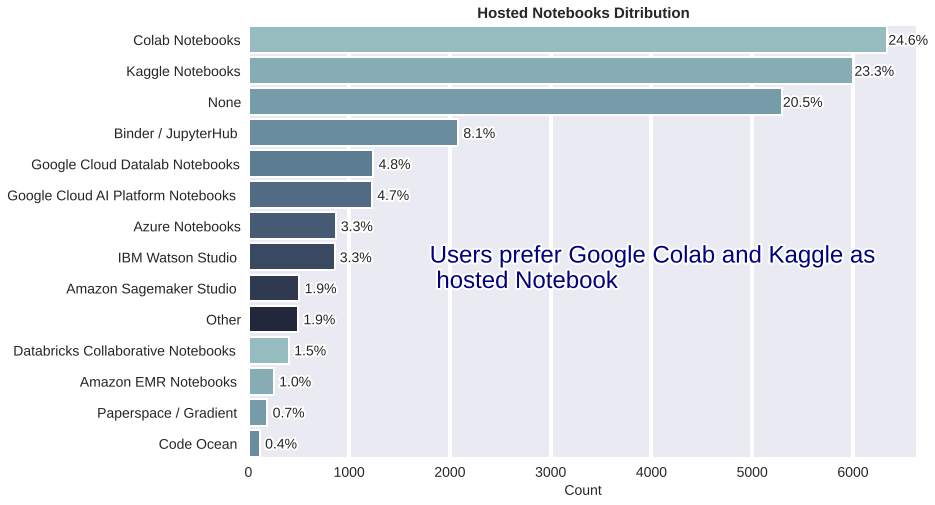

In [18]:
#preparing the data by compining the multible choice answers in one series
df_h_notebooks = df[[i for i in df.columns if 'Q10' in i]]
df_h_notebooks_all = pd.Series(dtype='int')
for i in df_h_notebooks.columns:
    df_h_notebooks_all[df_h_notebooks[i].value_counts().index[0]] = df_h_notebooks[i].count()

df_h_notebooks_all = df_h_notebooks_all.sort_values(ascending=False)
#ploting the graph
plt.figure(figsize=(12,8))
splot = sb.barplot(x = df_h_notebooks_all.values ,y = df_h_notebooks_all.index ,palette=custom_color)

#add annotation to each bar
total = df_h_notebooks_all.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(220+p.get_width(), p.get_y()+0.55*p.get_height(),
            '%.1f'%(ratio*100)+'%',
             ha='center', va='center')
    
# Decorate the plot
plt.annotate('Users prefer Google Colab and Kaggle as\n hosted Notebook' , xy =(1800,8),fontsize=24,color='navy')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Hosted Notebooks Ditribution',fontsize=15,weight='bold')
plt.xlabel('Count',fontsize=14);

*As there are many developers prefer to use IDE's, there are others who prefer to code on Hosted Notebooks especially Google Colab and Kaggle Notebooks*


<div id="vis"></div>
    
    
# Q14 Visualization libraries
Here i use the wordcloud library with using Pillow libarary to form a wordclould on a mask of an image , and the words exist according to their frequency, As in the graph Matplotlib and seaborn are the most favourite visualization libraries

In [19]:
#preparing the data to compine the results from the multible choice answers
df_vis = df[[i for i in df.columns if 'Q14' in i]]
df_vis_all = pd.Series(dtype='int')
for i in df_vis.columns:
    df_vis_all[df_vis[i].value_counts().index[0]] = df_vis[i].count()

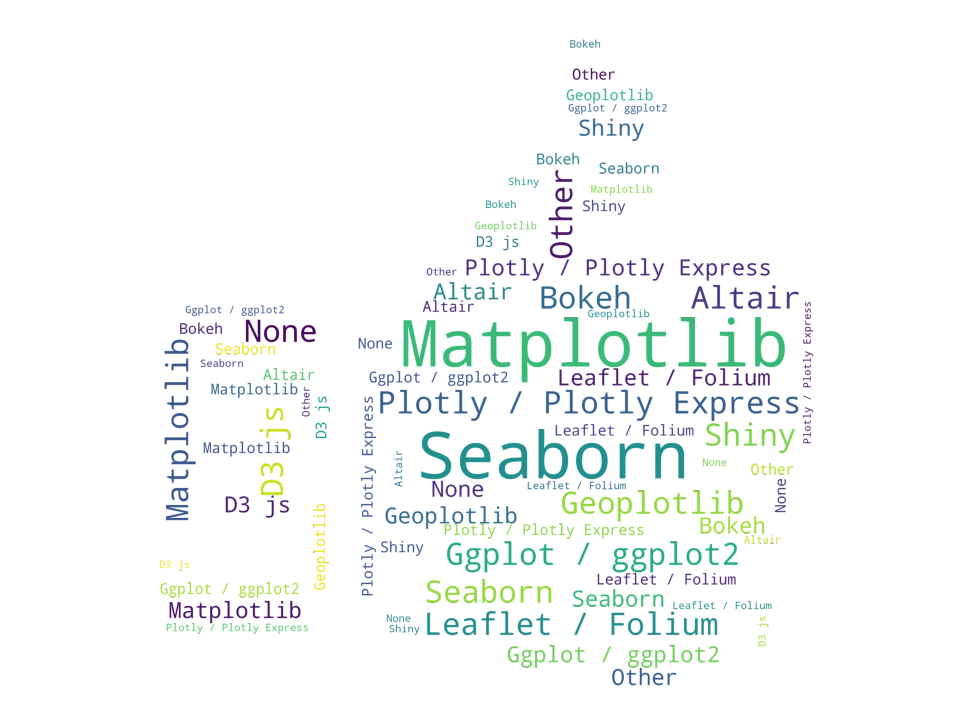

In [20]:
#importing the necessary libraries
from wordcloud import WordCloud
from PIL import Image


# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(18, 13))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

mask = np.array(Image.open('../input/masks/upvote.png'))

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color=None,mode="RGBA"
                      ,max_words=70, collocations=False,mask=mask
                      ,repeat=True).generate_from_frequencies(df_vis_all)
# Plot
plot_cloud(wordcloud)

*It's clear that Matplotlib and seaborn libraries are the most used as they are very popular python libraries, while Ggplot is used alot with R language*


<div id="compensation"></div>
    
    
# Q24 Current yearly compensation
Annual compensation, in the simplest terms, is the combination of your base salary and the value of any financial benefits your employer provides ex: Annual bonuses or commissions, insurance and so on.

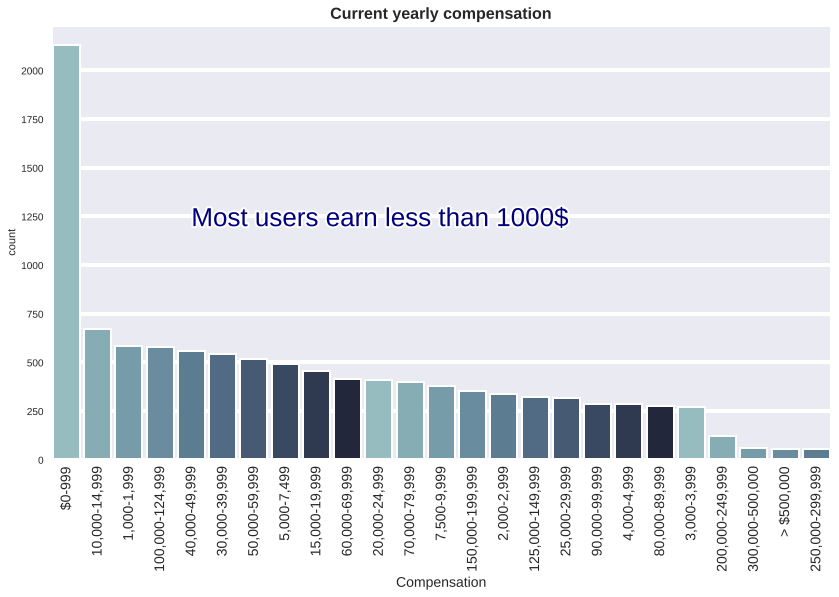

In [21]:
#preparing the data
age_data = df['Q24'].value_counts().sort_values(ascending=False)

#ploting the graph
plt.style.use('seaborn')
plt.figure(figsize=(14,8))
sb.countplot(x="Q24", data=df, palette = custom_color,order=age_data.index)

#decorating the graph
plt.title('Current yearly compensation',fontsize=16,weight = 'bold')
plt.annotate('Most users earn less than 1000$' , xy =(4,1200),fontsize=26,color='navy')
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Compensation',fontsize=14);

*It makes sense that most of beginners take lower compensations while other compensation rates varies much.*

# **Machine Learning**

Machine Learning may seem a very modern term while actually Arthur Samuel came up with this term on the 1950s and after that Frank Rosenblatt created the perceptron.the first software as machine designed by IBM, and at the 1960s Algorithms and Neural networks are created, But after the 2000's The Real ML applications became reality.


<div id="mlyears"></div>
    
    
# Q15 Years of using Machine learning methods

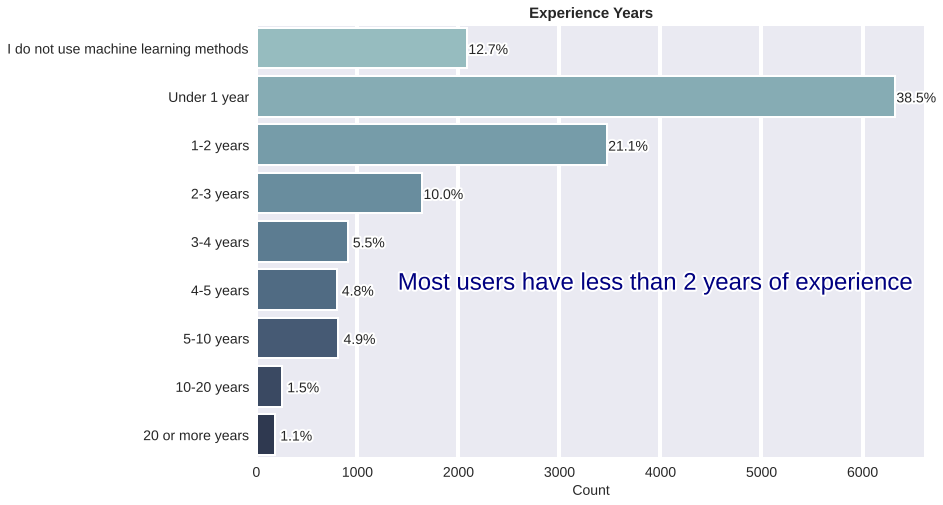

In [22]:
#preparing the data
years_order =  ['I do not use machine learning methods', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years'
                ,'4-5 years','5-10 years', '10-20 years', '20 or more years']
ml_yrs_df = df['Q15'].dropna().value_counts()[years_order]
#plotting the graph
plt.figure(figsize=(12,8))
splot = sb.barplot(x = ml_yrs_df.values ,y = ml_yrs_df.index ,palette=custom_color)

#add annotation to each bar
total = ml_yrs_df.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(220+p.get_width(), p.get_y()+0.55*p.get_height(),
            '%.1f'%(ratio*100)+'%',
             ha='center', va='center')

#decorating the plot
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
plt.annotate('Most users have less than 2 years of experience' , xy =(1400,5),fontsize=24,color='navy')
plt.title('Experience Years',fontsize=15,weight='bold');

*As in the graph most Machine learning method users just started using them in the last 2 years.*


<div id="frame"></div>
    
    
# Q16 Machine Learning Frameworks used

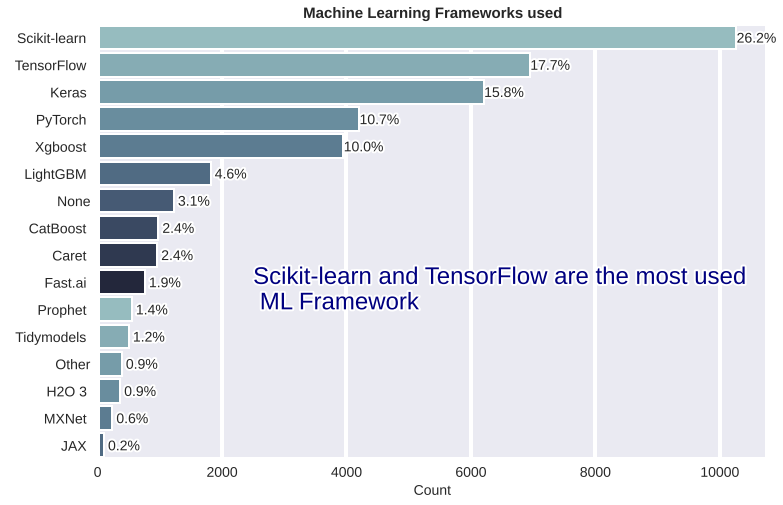

In [23]:
#preparing the data to compine the results from the multible choice answers
df_ML_frame = df[[i for i in df.columns if 'Q16' in i]]
df_ML_frame_all = pd.Series(dtype='int')
for i in df_ML_frame.columns:
    df_ML_frame_all[df_ML_frame[i].value_counts().index[0]] = df_ML_frame[i].count()

df_ML_frame_all = df_ML_frame_all.sort_values(ascending=False)
#ploting the graph
plt.figure(figsize=(12,8))

splot = sb.barplot(x = df_ML_frame_all.values ,y = df_ML_frame_all.index ,palette=custom_color)

#add annotation to each bar
total = df_ML_frame_all.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(340+p.get_width(), p.get_y()+0.55*p.get_height(),
            '%.1f'%(ratio*100)+'%',
             ha='center', va='center')
    
# Decorate the plot
plt.annotate('Scikit-learn and TensorFlow are the most used\n ML Framework' , xy =(2500,10),fontsize=24,color='navy')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Machine Learning Frameworks used',fontsize=15,weight='bold')
plt.xlabel('Count',fontsize=14);

*Scikit-learn, TensorFlow libraries and Keras are used the most while JAX and MXNet are the fewest*

<div id="algo"></div>
    
    
# Q17 Machine learning Algorithms used

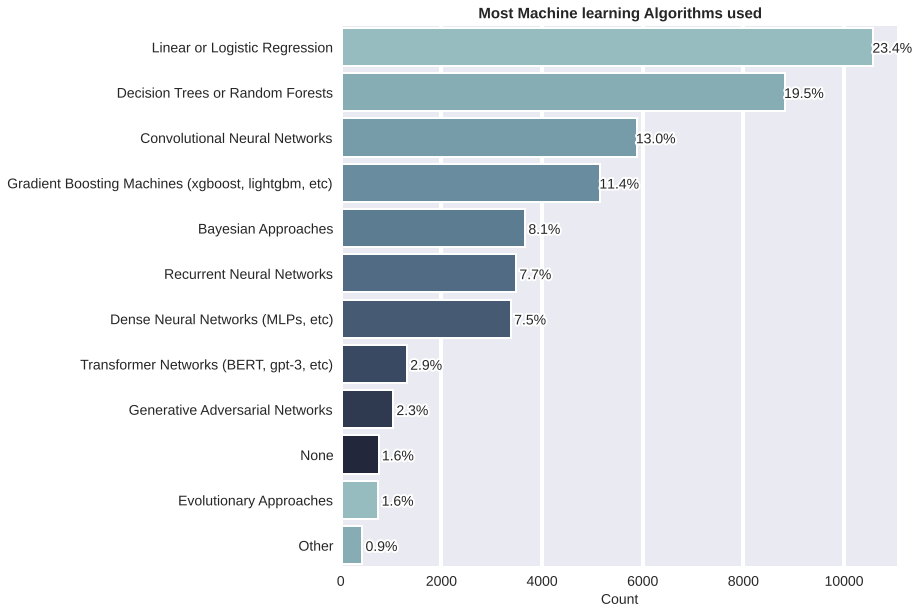

In [24]:
#preparing the data
df_algorithms = df[[i for i in df.columns if 'Q17' in i]]
df_algorithms_all = pd.Series(dtype='int')
for i in df_algorithms.columns:
    df_algorithms_all[df_algorithms[i].value_counts().index[0]] = df_algorithms[i].count()

df_algorithms_all = df_algorithms_all.sort_values(ascending=False)
plt.figure(figsize=(10,10))

splot = sb.barplot(x = df_algorithms_all.values ,y = df_algorithms_all.index ,palette=custom_color)

#add annotation to each bar
total = df_algorithms_all.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(400+p.get_width(), p.get_y()+0.55*p.get_height(),
            '%.1f'%(ratio*100)+'%',
             ha='center', va='center')

# Decorate the plot
plt.title('Most Machine learning Algorithms used',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14);


*Ofcourse Linear and Logistic regressions are on the top followed by Decision Trees and Random Forests*

And this is a bonus, When you realize that even the developers of seaborn has this sense of humor you can't ignore the fun and magic of Data science.

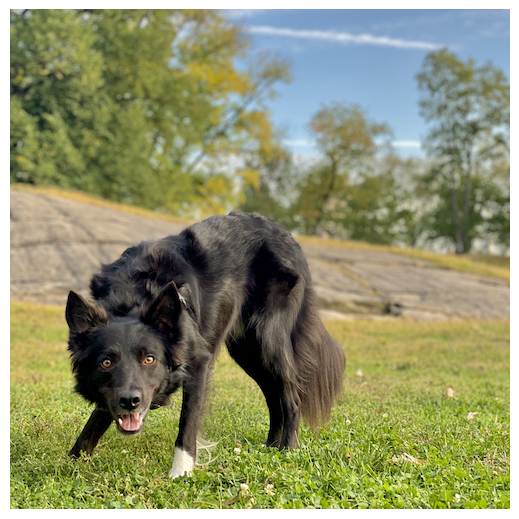

In [25]:
#There is actually a function in seaborn called dogplot()
sb.dogplot()